In [ ]:
# Задача
# 1. Сгенерируйте набор данных для предсказания временных последовательностей. Выполните тренировку RNN
# 2. Модифицируйте сеть, используя в качестве рекуррентного слоя LSTM слой библиотеки pytorch.
# https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

# 3. решите задачу набора данных лекции 7.

In [11]:
import numpy as np
import torch

import torch.nn as nn
import matplotlib.pyplot as plt


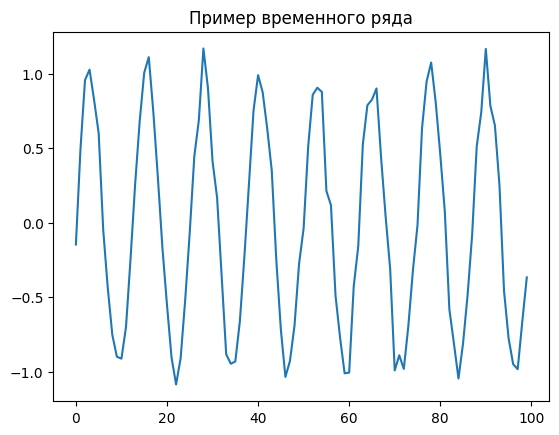

In [12]:
# Генерация синтетических данных
def generate_sine_wave(seq_length=100, num_sequences=1000):

    x = np.linspace(0, 50, seq_length)
    y = np.sin(x) + np.random.normal(0, 0.1, size=(num_sequences, seq_length))  # Добавляем шум
    return y


# Генерируем 1000 последовательностей длиной 100
data = generate_sine_wave(seq_length=100, num_sequences=1000)
data_tensor = torch.tensor(data, dtype=torch.float32)

plt.plot(data[0])
plt.title("Пример временного ряда")
plt.show()

In [4]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :]) 
        return out

# Подготовка данных для обучения
input_data = data_tensor[:, :-1].unsqueeze(-1)
target_data = data_tensor[:, -1].unsqueeze(-1)

# Разделим на обучающую и тестовую выборки
train_size = int(0.8 * len(data))
train_data, test_data = input_data[:train_size], input_data[train_size:]
train_target, test_target = target_data[:train_size], target_data[train_size:]



# Модель, критерий и оптимизатор
model_rnn = RNNModel(input_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.001)



# Обучение
epochs = 100
for epoch in range(epochs):
    
    model_rnn.train()
    optimizer.zero_grad()
    
    output = model_rnn(train_data)
    loss = criterion(output, train_target)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Оценка модели

model_rnn.eval()
with torch.no_grad():


    predictions = model_rnn(test_data)
    test_loss = criterion(predictions, test_target)
    print(f"Test Loss: {test_loss.item()}")

Epoch 0/100, Loss: 0.05755727365612984
Epoch 10/100, Loss: 0.014616335742175579
Epoch 20/100, Loss: 0.010886655189096928
Epoch 30/100, Loss: 0.009626644663512707
Epoch 40/100, Loss: 0.009572152979671955
Epoch 50/100, Loss: 0.009599769487977028
Epoch 60/100, Loss: 0.009569840505719185
Epoch 70/100, Loss: 0.009547856636345387
Epoch 80/100, Loss: 0.00953825656324625
Epoch 90/100, Loss: 0.009533383883535862
Test Loss: 0.012029272504150867


In [6]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):

        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Используем последний выход LSTM
        return out

# Модель, критерий и оптимизатор для LSTM
model_lstm = LSTMModel(input_size=1)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

# Обучение модели LSTM
for epoch in range(epochs):

    model_lstm.train()
    optimizer.zero_grad()

    output = model_lstm(train_data)
    loss = criterion(output, train_target)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Оценка модели
model_lstm.eval()
with torch.no_grad():
 
    predictions = model_lstm(test_data)
    test_loss = criterion(predictions, test_target)
    print(f"Test Loss (LSTM): {test_loss.item()}")

Epoch 0/100, Loss: 0.1446252465248108
Epoch 10/100, Loss: 0.04902460053563118
Epoch 20/100, Loss: 0.009767196141183376
Epoch 30/100, Loss: 0.010769728571176529
Epoch 40/100, Loss: 0.010321824811398983
Epoch 50/100, Loss: 0.009650498628616333
Epoch 60/100, Loss: 0.009655761532485485
Epoch 70/100, Loss: 0.00952676311135292
Epoch 80/100, Loss: 0.00954448338598013
Epoch 90/100, Loss: 0.009528975933790207
Test Loss (LSTM): 0.011898815631866455


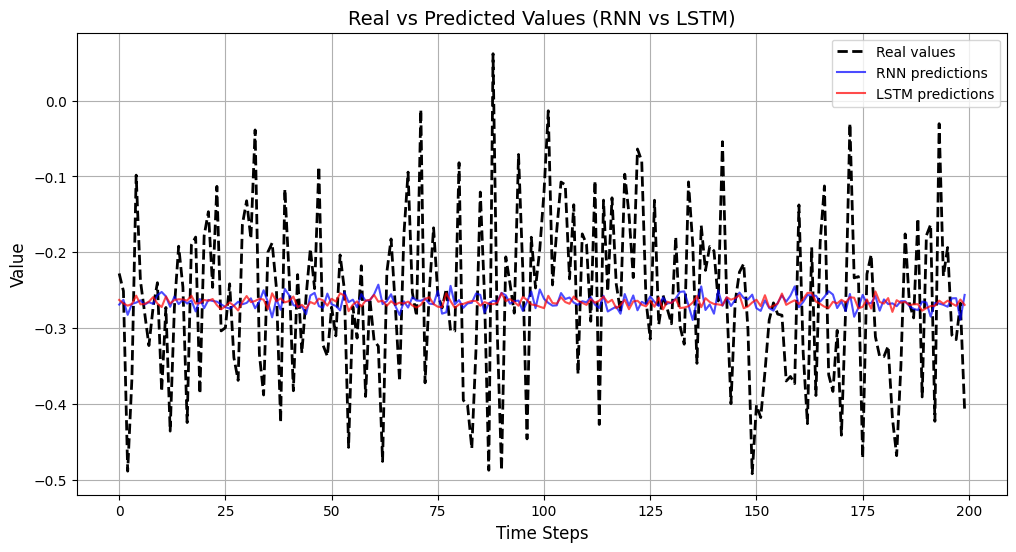

In [7]:
import matplotlib.pyplot as plt

# Обучение 
model_rnn.eval()
with torch.no_grad():
    rnn_predictions = model_rnn(test_data)

# Обучение 
model_lstm.eval()
with torch.no_grad():
    lstm_predictions = model_lstm(test_data)
rnn_predictions = rnn_predictions.squeeze().tolist()
lstm_predictions = lstm_predictions.squeeze().tolist()
test_target = test_target.squeeze().tolist()

# Визуализация результатов

plt.figure(figsize=(12, 6))
plt.plot(test_target, label='Real values', color='black', linestyle='--', linewidth=2)
plt.plot(rnn_predictions, label='RNN predictions', color='blue', linestyle='-', alpha=0.7)
plt.plot(lstm_predictions, label='LSTM predictions', color='red', linestyle='-', alpha=0.7)


plt.title('Real vs Predicted Values (RNN vs LSTM)', fontsize=14)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Из лекции 7
# Задание (файл 2)
# Разделить данные на N групп. (возможно, выбрать первые M данных для обучения)
# Реализовать предсказание ARIMA для 2 (тренировочной группы) на основе 1. Рассчитать MSE.
# Исследовать качество работы модели в зависимости от параметров (для групп 1-2).
# (1)Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
# "экспоненциальное среднее".

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


--- Модель ARIMA для группы 1 ---
Ошибка MSE для модели ARIMA(1,0,0): 5.7036246443


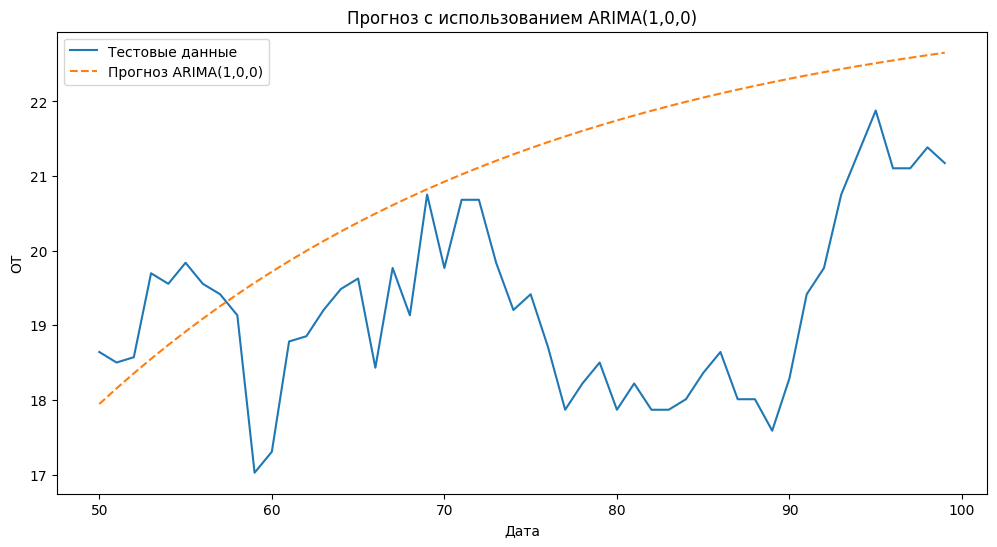

In [9]:
#Загрузка данных
df = pd.read_csv('ETTm1.csv')
x = df.OT  

M = 50 
N = 50 

x_train = x[:M]  # Первая группа для обучения
x_test = x[M:M+N]  # Вторая группа для теста

# Построение модели ARIMA
print("\n--- Модель ARIMA для группы 1 ---")


model_arima = ARIMA(x_train, order=(1, 0, 0)).fit()
predictions_arima = model_arima.forecast(len(x_test))

# Оценка ошибки модели ARIMA (MSE)
mse_arima = mean_squared_error(x_test, predictions_arima)



print(f'Ошибка MSE для модели ARIMA(1,0,0): {mse_arima:.10f}')

plt.figure(figsize=(12, 6))
plt.plot(x_test, label='Тестовые данные')
plt.plot(predictions_arima, label='Прогноз ARIMA(1,0,0)', linestyle='--')
plt.title('Прогноз с использованием ARIMA(1,0,0)')
plt.xlabel('Дата')
plt.ylabel('OT')
plt.legend()
plt.show()


--- Итеративное предсказание с использованием экспоненциального сглаживания ---


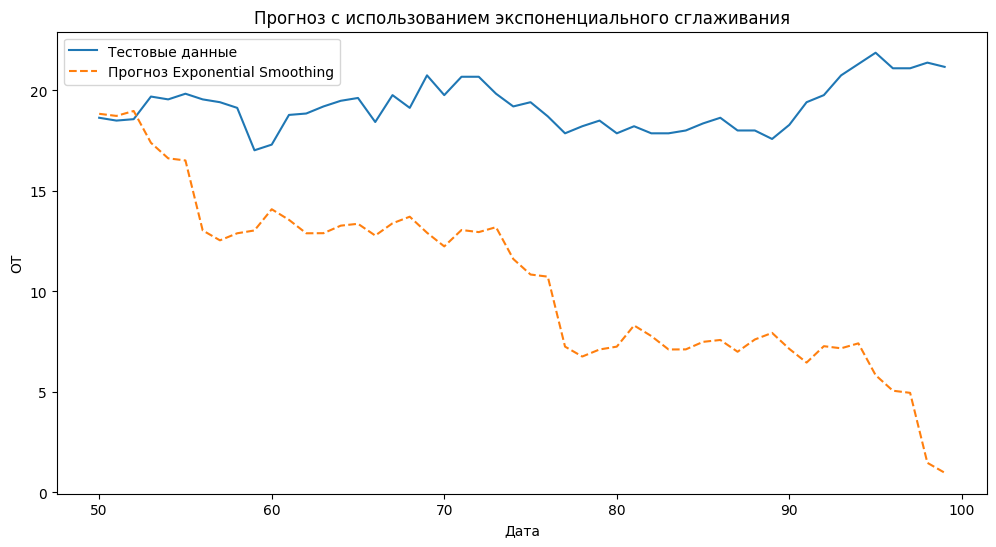

Ошибка MSE для модели Exponential Smoothing: 96.5208004445


In [10]:
# Итеративное предсказание с использованием экспоненциального сглаживания
print("\n--- Итеративное предсказание с использованием экспоненциального сглаживания ---")



x_train_iter = x[:M]
x_test_iter = x[M:M+N]



# Используем экспоненциальное сглаживание
exp_model = ExponentialSmoothing(x_train_iter, trend='add', seasonal='add', seasonal_periods=21).fit()
exp_predictions = exp_model.forecast(len(x_test_iter))


# Строим график
plt.figure(figsize=(12, 6))
plt.plot(x_test_iter, label='Тестовые данные')
plt.plot(exp_predictions, label='Прогноз Exponential Smoothing', linestyle='--')
plt.title('Прогноз с использованием экспоненциального сглаживания')
plt.xlabel('Дата')
plt.ylabel('OT')
plt.legend()
plt.show()
mse_exp = mean_squared_error(x_test_iter, exp_predictions)



print(f'Ошибка MSE для модели Exponential Smoothing: {mse_exp:.10f}')